In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [20]:
import torch
import torchvision as tv
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Analysis of Raw Images

In [96]:
# Load the test set without applying normalization
test_set = CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Set batch size of x
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=False)

Files already downloaded and verified


## Mean and SD of Pixels
This calculates the average and deviation of the pixels in each image of the CIFAR-10 dataset.

In [97]:
# Iterate over the test set to compute the mean and standard deviation
mean = 0.
std = 0.
num_samples = 0.
for data, _ in test_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    num_samples += batch_samples

mean /= num_samples
std /= num_samples

print("Mean:", mean)
print("Std:", std)

Mean: tensor([0.4914, 0.4822, 0.4465])
Std: tensor([0.2023, 0.1994, 0.2010])


The standard deviation for each image is very small (~0.20), therefore it indicates that the pixel values are not very spread out and have relatively low variance.

# Analysis of Normalised Images
Applying our learnings from the analysis of raw images, we can now conclude that **a normalisation of (0.5, 0.5, 0.5) is required** to bring the mean nearer to zero.

This normalizes the pixel values by subtracting 0.5 from each channel (shifting the range from [0, 1] to [-0.5, 0.5]) and dividing by 0.5 (scaling the range to [-1, 1]).

In [98]:
# Transform data into Tensor form (Torch.Tensor)
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

# Load the test set and create a dataloader
test_set = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Set batch size of x
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=False)

Files already downloaded and verified


In [99]:
# Iterate over the test set to compute the mean and standard deviation
mean = 0.
std = 0.
num_samples = 0.
for data, _ in test_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    num_samples += batch_samples

mean /= num_samples
std /= num_samples

print("Mean:", mean)
print("Std:", std)

Mean: tensor([-0.0172, -0.0357, -0.1069])
Std: tensor([0.4046, 0.3988, 0.4019])


The mean is close to 0. Therefore, the CNN model that we will train is not biased towards any pixel value range.

The standard deviation is similar (~0.40). Therefore, the CNN model that we will train will not be sensitive to variations in pixel values across images.

## Sample of 10 Random Images
After normalisation, here is the visualisation of the first 10 images to explore image quality of the CIFAR-10 Dataset.

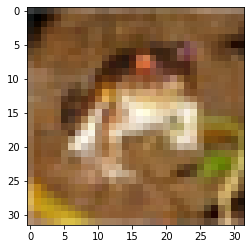

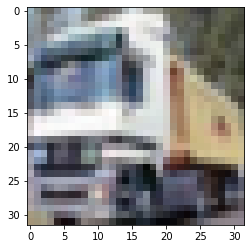

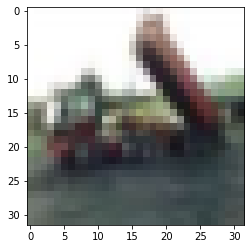

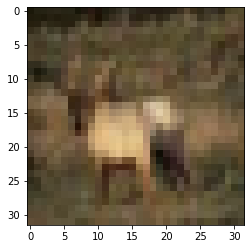

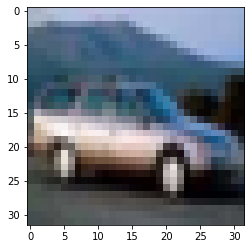

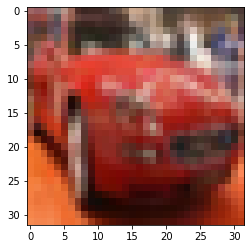

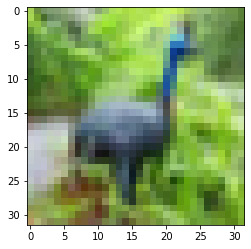

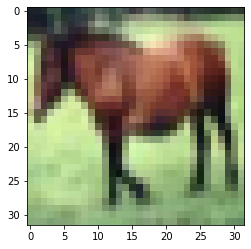

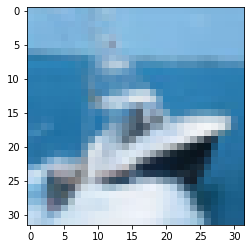

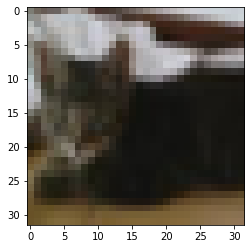

In [78]:
def display(img):
    # Normalise image Tensor
    img = img / 2 + 0.5
    
    # Convert into numpy array
    npimg = img.numpy()
    
    # Transpose as numpy needs h, w, c but pytorch uses c, h, w
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

# get first 100 training images
dataiter = iter(test_loader)
imgs, lbls = next(dataiter)

for i in range(10):
    display(tv.utils.make_grid(imgs[i]))

## Distribution of Labels
In the test batch that we analyse, the labels are distributed relatively evenly.


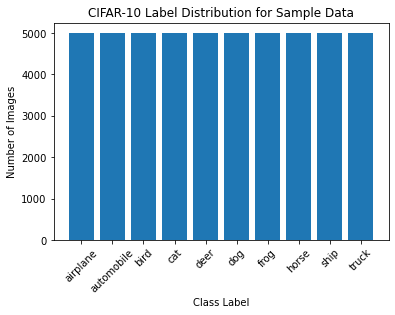

In [79]:
# Create a list of the class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a dictionary to count the number of images in each class
label_counts = {}
for i in range(10):
    label_counts[class_labels[i]] = 0
for lbl in lbls:
    label_counts[class_labels[lbl]] += 1

# Create a bar chart to visualize the label distribution
plt.bar(range(len(label_counts)), list(label_counts.values()), align='center')
plt.xticks(range(len(label_counts)), list(label_counts.keys()), rotation=45)
plt.title('CIFAR-10 Label Distribution for Sample Data')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.show()

## Sample Image from Each Label

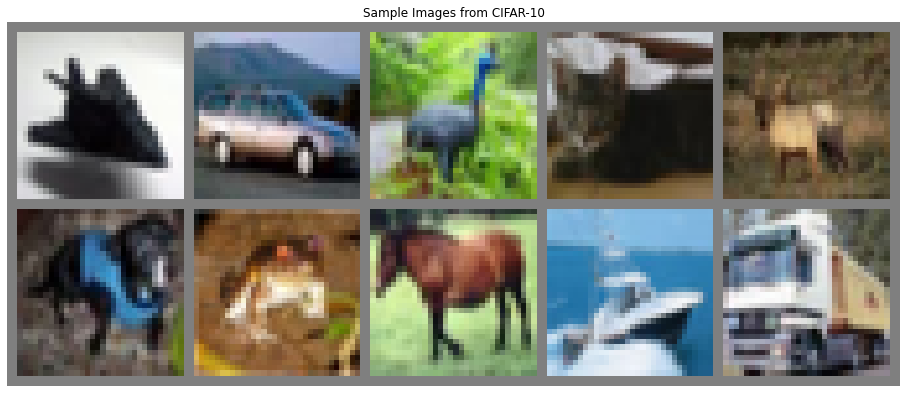

In [80]:
# Create a dictionary to store a sample image from each class
sample_images = {}
for i in range(10):
    for img, lbl in zip(imgs, lbls):
        # check if the label of the current image matches the current class label
        if lbl == i:
            # add the image to the dictionary of sample images for the current class label
            sample_images[lbl] = img
            break

# Create a grid of images to display the sample images
grid_image = tv.utils.make_grid(list(sample_images.values()), nrow=5)
npimg = grid_image.numpy()
plt.figure(figsize=(16,8))
# Normalise image Tensor
npimg = npimg / 2 + 0.5
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis('off')
plt.title('Sample Images from CIFAR-10')
plt.show()